In [1]:
#Loading And Understanding Our Data

In [2]:
import pandas as pd
import numpy as np

Our dataset is from: [https://www.kaggle.com/datasets/jackogozaly/data\-science\-and\-stem\-salaries?datasetId=1640011&sortBy=voteCount](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?datasetId=1640011&sortBy=voteCount)


In [3]:
df = pd.read_csv("Levels_Fyi_Salary_Data.csv")

In [4]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [5]:
#Cleaning Our Data

In [6]:
df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [7]:
#numbers of rows in dataset
len(df)

62642

In [8]:
df['company'].isnull().values.any() #tells us if there are missing values in this column

True

In [9]:
df['timestamp'].isnull().sum() #tells us how many null values are in a specific column

0

In [10]:
df['company'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
62637    False
62638    False
62639    False
62640    False
62641    False
Name: company, Length: 62642, dtype: bool>

In [11]:
#identifies all missing variables in all columns
pd.isnull(df).sum()

timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

In [12]:
# code that identifies the number  of all N/A's in columns
missing_cols = []
for col in df.columns:
    if df[col].isnull().values.any():
        num = df[col].isnull().sum()
        missing_cols.append([col, num])

In [13]:
missing_cols

[['company', 5],
 ['level', 119],
 ['tag', 854],
 ['gender', 19540],
 ['otherdetails', 22505],
 ['dmaid', 2],
 ['Race', 40215],
 ['Education', 32272]]

In [14]:
#Finding the useless variables
df['Race'].notnull().sum()

22427

In [15]:
df['level'].value_counts()

L4                             5014
L5                             4871
L3                             3337
L6                             2871
Senior Software Engineer       1443
                               ... 
Mid Market                        1
Gr 7                              1
Senior BA                         1
Consulting Analyst                1
Bioinformatics Scientist II       1
Name: level, Length: 2923, dtype: int64

In [16]:
#Dropping all the N/A's
df = df.drop(['Race'], axis = 1)

In [17]:
df = df.drop(['Education'], axis = 1)

In [18]:
df = df.drop(['otherdetails'], axis = 1)

In [19]:
df = df.drop(['level'], axis = 1)

In [20]:
df = df.drop(['tag'], axis = 1)

In [21]:
df = df.drop(['dmaid'], axis = 1)

In [22]:
df = df.drop(['cityid'], axis = 1)

In [23]:
df = df.drop(['rowNumber'], axis = 1)

In [24]:
df = df.drop(['timestamp'], axis = 1)

In [25]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace = True)

In [26]:
# Columns left after dropping
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'Masters_Degree', 'Bachelors_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic'],
      dtype='object')

In [27]:
df.tail()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
43093,Amazon,Software Engineer,135000,"Seattle, WA",1.0,0.0,104000.0,3000.0,18500.0,Male,0,0,0,0,0,0,0,0,0,0
43094,Amazon,Software Engineer,350000,"Austin, TX",14.0,1.0,160000.0,175000.0,56250.0,Male,0,0,0,0,0,0,0,0,0,0
43095,Microsoft,Product Manager,305000,"Seattle, WA",20.0,2.0,200000.0,75000.0,30000.0,Female,0,0,0,0,0,0,0,0,0,0
43096,Amazon,Software Engineer,152000,"Seattle, WA",3.0,0.0,106000.0,26000.0,20000.0,Male,0,0,0,0,0,0,0,0,0,0
43097,apple,Software Engineer,200000,"Sunnyvale, CA",0.0,0.0,155000.0,27000.0,19000.0,Male,0,0,0,0,0,0,0,0,0,0


In [28]:
df = df[df['basesalary'] != 0]

In [29]:
#the number of rows in this dataset after cleaning data
len(df)

42109

In [30]:
#making a new column for degree's/education
def check_education(master, bach, doc, high, some):
    if master == 1:
        return "Masters"
    elif bach == 1:
        return "Bachelors"
    elif doc == 1:
        return "PHD"
    elif high == 1:
        return 'Highschool'
    elif some == 1:
        return "Some"
    else:
        return "Missing"

In [31]:
df['education'] = df.apply(lambda x: check_education(x.Masters_Degree, x.Bachelors_Degree, x.Doctorate_Degree, x.Highschool, x.Some_College), axis = 1)
df.head()

,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,...,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,education
0,GE Digital,Software Engineer,140000,"San Ramon, CA",4.0,4.0,130000.0,0.0,10000.0,Male,...,0,0,0,0,0,0,0,0,0,Missing
1,Amazon,Software Engineer,172000,"Seattle, WA",12.0,2.0,142000.0,30000.0,0.0,Male,...,0,0,0,0,0,0,0,0,0,Missing
2,Uber,Software Engineer,325000,"San Francisco, CA",7.0,2.0,161000.0,140000.0,25000.0,Male,...,0,0,0,0,0,0,0,0,0,Missing
3,Microsoft,Software Engineer,150000,"Seattle, WA",4.0,0.0,118000.0,5000.0,12000.0,Male,...,0,0,0,0,0,0,0,0,0,Missing
4,Google,Software Engineer,640000,"Mountain View, CA",11.0,4.0,210000.0,380000.0,50000.0,Male,...,0,0,0,0,0,0,0,0,0,Missing


In [32]:
# see how many are variables missing 
len(df[df['education'] == 'Missing'])

14346

In [33]:
df = df[df['education'] != 'Missing']
df.reset_index(drop=True, inplace=True)

In [34]:
# post results after cleaning data
len(df[df['education'] == 'Missing'])

0

**Exploring Our Data**



In [36]:
#what is the largest bonus
max(df['bonus'])

900000.0

In [37]:
#find how much years of expierence is needed to get a base salary above $1,000,000
df.describe()
df['yearsofexperience'][df['basesalary'] >= 1000000 ]

Series([], Name: yearsofexperience, dtype: float64)

In [38]:
#find which company is more popular
df['company'].mode #finds out the most frequent variable in a column

<bound method Series.mode of 0        Capital One
1          Bloomberg
2             Amazon
3              Apple
4           Synopsys
            ...     
27758       Facebook
27759         Google
27760         Zapier
27761       Facebook
27762       Facebook
Name: company, Length: 27763, dtype: object>

In [39]:
#Featuring engineering and more cleaning

In [40]:
#basically simplifying to show the popular state
def get_state(x):
    words = x.split(', ')
    state = words[1]
    if state == 'CA':
        return 'CA'
    elif state == 'WA':
        return 'WA'
    elif state == 'NY':
        return 'NY'
    else:
        return 'Other'

In [41]:
df['state'] = df['location'].apply(get_state)
df.drop(['location'], axis = 1, inplace = True)

In [42]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,education,state
0,Capital One,Data Scientist,125000,1.0,0.0,121000.0,0.0,4000.0,Male,0,...,1,0,0,0,0,0,0,0,PHD,Other
1,Bloomberg,Software Engineer,170000,0.0,0.0,142000.0,0.0,18000.0,Male,1,...,0,0,0,0,0,0,0,0,Masters,NY
2,Amazon,Data Scientist,332000,1.0,0.0,185000.0,17000.0,130000.0,Male,0,...,1,0,0,0,0,0,0,0,PHD,CA
3,Apple,Software Engineer,240000,3.0,3.0,150000.0,75000.0,15000.0,Female,0,...,1,0,0,0,0,0,0,0,PHD,CA
4,Synopsys,Software Engineer,310000,25.0,9.0,210000.0,40000.0,60000.0,Male,0,...,1,0,0,0,0,0,0,0,PHD,CA


In [43]:
df.state.value_counts()

Other    11907
CA        9042
WA        4742
NY        2072
Name: state, dtype: int64

In [44]:
#making a new column for top 15 companies
top_15_popular = list(df['company'].value_counts().index)[:15]
def in_popular(x):
    if x in top_15_popular:
        return True
    else:
        return False
df['in_top_15'] = df['company'].apply(in_popular)

In [45]:
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,education,state,in_top_15
0,Capital One,Data Scientist,125000,1.0,0.0,121000.0,0.0,4000.0,Male,0,...,0,0,0,0,0,0,0,PHD,Other,True
1,Bloomberg,Software Engineer,170000,0.0,0.0,142000.0,0.0,18000.0,Male,1,...,0,0,0,0,0,0,0,Masters,NY,True
2,Amazon,Data Scientist,332000,1.0,0.0,185000.0,17000.0,130000.0,Male,0,...,0,0,0,0,0,0,0,PHD,CA,True
3,Apple,Software Engineer,240000,3.0,3.0,150000.0,75000.0,15000.0,Female,0,...,0,0,0,0,0,0,0,PHD,CA,True
4,Synopsys,Software Engineer,310000,25.0,9.0,210000.0,40000.0,60000.0,Male,0,...,0,0,0,0,0,0,0,PHD,CA,False


In [46]:
# name_of_dataframe.groupby(by = name of column you want to group by)[column of data you want to look at].what function you want to apply
# u can use .max, .min, .mean, .count, .reset_index, 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [47]:
df.groupby(by = 'title')['yearsofexperience'].mean()

title
Business Analyst                 5.866530
Data Scientist                   5.021361
Hardware Engineer                7.889088
Human Resources                 10.789189
Management Consultant            7.697802
Marketing                        9.328205
Mechanical Engineer              6.045455
Product Designer                 7.465306
Product Manager                  9.074825
Recruiter                        8.302128
Sales                            8.693878
Software Engineer                6.058590
Software Engineering Manager    14.254038
Solution Architect              12.027944
Technical Program Manager       12.370904
Name: yearsofexperience, dtype: float64

In [48]:
#Graphs

In [49]:
import plotly.express as px #importing plotly

In [50]:
len('Female')

6

In [51]:
#histogram
softeng = df[df['title'] == 'Software Engineer']
plot12 = px.histogram(softeng, x='basesalary', title='Software Engineer Base Salary per State', color='state')
plot12.show()

In [52]:
#piechart
popular_titles = df.groupby(by = 'title').count().reset_index().sort_values(by = 'company', ascending = False).head()
popular_titles

,title,company,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,education,state,in_top_15
11,Software Engineer,17648,17648,17648,17648,17648,17648,17648,17648,17648,...,17648,17648,17648,17648,17648,17648,17648,17648,17648,17648
8,Product Manager,1998,1998,1998,1998,1998,1998,1998,1998,1998,...,1998,1998,1998,1998,1998,1998,1998,1998,1998,1998
12,Software Engineering Manager,1362,1362,1362,1362,1362,1362,1362,1362,1362,...,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362
1,Data Scientist,1264,1264,1264,1264,1264,1264,1264,1264,1264,...,1264,1264,1264,1264,1264,1264,1264,1264,1264,1264
2,Hardware Engineer,1118,1118,1118,1118,1118,1118,1118,1118,1118,...,1118,1118,1118,1118,1118,1118,1118,1118,1118,1118


In [53]:
fig = px.pie(popular_titles, values = 'company', names = 'title', title = 'Job Positions in the Data Science and STEM Feild')
fig.show()

In [54]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,2.776300e+04,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000,27763.000000
mean,2.039209e+05,7.171073,2.707162,136773.799661,47489.200195,19008.752656,0.496848,0.427800,0.055037,0.011166,0.012535,0.411123,0.276627,0.027591,0.023845,0.038468
std,1.330307e+05,5.807141,3.293359,56781.128163,74428.782590,25545.132804,0.499999,0.494769,0.228057,0.105079,0.111256,0.492046,0.447339,0.163800,0.152568,0.192328
min,1.000000e+04,0.000000,0.000000,4000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.240000e+05,3.000000,0.000000,105000.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.800000e+05,6.000000,2.000000,138000.000000,22000.000000,14000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.500000e+05,10.000000,4.000000,165000.000000,60000.000000,25000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,4.980000e+06,45.000000,40.000000,900000.000000,1000000.000000,900000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# Convert out categorical data into numbers, using one hot encoding
print(df['gender'].unique())

['Male' 'Female' 'Other']


In [56]:
df['gender'].value_counts()

Male      22677
Female     4909
Other       177
Name: gender, dtype: int64

In [57]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['gender'])
print(one_hot_encoded_df)

           company                         title  totalyearlycompensation  \
0      Capital One                Data Scientist                   125000   
1        Bloomberg             Software Engineer                   170000   
2           Amazon                Data Scientist                   332000   
3            Apple             Software Engineer                   240000   
4         Synopsys             Software Engineer                   310000   
...            ...                           ...                      ...   
27758     Facebook  Software Engineering Manager                  1470000   
27759       Google               Product Manager                  4500000   
27760       Zapier  Software Engineering Manager                  1605000   
27761     Facebook  Software Engineering Manager                  2372000   
27762     Facebook               Product Manager                  4980000   

       yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  \
0 

In [58]:
df['Female_gender'] = one_hot_encoded_df['gender_Female']
df['Male_gender'] = one_hot_encoded_df['gender_Male']
df['Other_Gender'] = one_hot_encoded_df['gender_Other']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,education,state,in_top_15,Female_gender,Male_gender,Other_Gender
0,Capital One,Data Scientist,125000,1.0,0.0,121000.0,0.0,4000.0,Male,0,...,0,0,0,0,PHD,Other,True,0,1,0
1,Bloomberg,Software Engineer,170000,0.0,0.0,142000.0,0.0,18000.0,Male,1,...,0,0,0,0,Masters,NY,True,0,1,0
2,Amazon,Data Scientist,332000,1.0,0.0,185000.0,17000.0,130000.0,Male,0,...,0,0,0,0,PHD,CA,True,0,1,0
3,Apple,Software Engineer,240000,3.0,3.0,150000.0,75000.0,15000.0,Female,0,...,0,0,0,0,PHD,CA,True,1,0,0
4,Synopsys,Software Engineer,310000,25.0,9.0,210000.0,40000.0,60000.0,Male,0,...,0,0,0,0,PHD,CA,False,0,1,0


In [59]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'gender',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'education', 'state', 'in_top_15',
       'Female_gender', 'Male_gender', 'Other_Gender'],
      dtype='object')

In [60]:
print(df['state'].unique())

['Other' 'NY' 'CA' 'WA']


In [61]:
df['state'].value_counts()

Other    11907
CA        9042
WA        4742
NY        2072
Name: state, dtype: int64

In [62]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['state'])
print(one_hot_encoded_df)

           company                         title  totalyearlycompensation  \
0      Capital One                Data Scientist                   125000   
1        Bloomberg             Software Engineer                   170000   
2           Amazon                Data Scientist                   332000   
3            Apple             Software Engineer                   240000   
4         Synopsys             Software Engineer                   310000   
...            ...                           ...                      ...   
27758     Facebook  Software Engineering Manager                  1470000   
27759       Google               Product Manager                  4500000   
27760       Zapier  Software Engineering Manager                  1605000   
27761     Facebook  Software Engineering Manager                  2372000   
27762     Facebook               Product Manager                  4980000   

       yearsofexperience  yearsatcompany  basesalary  stockgrantvalue  \
0 

In [63]:
df['state_NY'] = one_hot_encoded_df['state_NY']
df['state_other'] = one_hot_encoded_df['state_Other']
df['state_WA'] = one_hot_encoded_df['state_WA']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Race_Hispanic,education,state,in_top_15,Female_gender,Male_gender,Other_Gender,state_NY,state_other,state_WA
0,Capital One,Data Scientist,125000,1.0,0.0,121000.0,0.0,4000.0,Male,0,...,0,PHD,Other,True,0,1,0,0,1,0
1,Bloomberg,Software Engineer,170000,0.0,0.0,142000.0,0.0,18000.0,Male,1,...,0,Masters,NY,True,0,1,0,1,0,0
2,Amazon,Data Scientist,332000,1.0,0.0,185000.0,17000.0,130000.0,Male,0,...,0,PHD,CA,True,0,1,0,0,0,0
3,Apple,Software Engineer,240000,3.0,3.0,150000.0,75000.0,15000.0,Female,0,...,0,PHD,CA,True,1,0,0,0,0,0
4,Synopsys,Software Engineer,310000,25.0,9.0,210000.0,40000.0,60000.0,Male,0,...,0,PHD,CA,False,0,1,0,0,0,0


In [64]:
print(df['title'].unique())

['Data Scientist' 'Software Engineer' 'Hardware Engineer'
 'Product Manager' 'Solution Architect' 'Software Engineering Manager'
 'Product Designer' 'Mechanical Engineer' 'Human Resources'
 'Business Analyst' 'Marketing' 'Sales' 'Technical Program Manager'
 'Management Consultant' 'Recruiter']


In [65]:
df['title'].value_counts()

Software Engineer               17648
Product Manager                  1998
Software Engineering Manager     1362
Data Scientist                   1264
Hardware Engineer                1118
Technical Program Manager         763
Product Designer                  735
Management Consultant             546
Solution Architect                501
Business Analyst                  487
Marketing                         390
Mechanical Engineer               286
Sales                             245
Recruiter                         235
Human Resources                   185
Name: title, dtype: int64

In [66]:
one_hot_encoded_df = pd.get_dummies(df, columns = ['title'])
print(one_hot_encoded_df)

           company  totalyearlycompensation  yearsofexperience  \
0      Capital One                   125000                1.0   
1        Bloomberg                   170000                0.0   
2           Amazon                   332000                1.0   
3            Apple                   240000                3.0   
4         Synopsys                   310000               25.0   
...            ...                      ...                ...   
27758     Facebook                  1470000                9.0   
27759       Google                  4500000               20.0   
27760       Zapier                  1605000               16.0   
27761     Facebook                  2372000               22.0   
27762     Facebook                  4980000               17.0   

       yearsatcompany  basesalary  stockgrantvalue     bonus  gender  \
0                 0.0    121000.0              0.0    4000.0    Male   
1                 0.0    142000.0              0.0   18000.0   

In [67]:
df['Marketing_title'] = one_hot_encoded_df['title_Marketing']
df['Mechanical Engineer_title'] = one_hot_encoded_df['title_Mechanical Engineer']
df['Product Designer_title'] = one_hot_encoded_df['title_Product Designer']
df['Recruiter_title'] = one_hot_encoded_df['title_Recruiter']
df['Sales_title'] = one_hot_encoded_df['title_Sales']
df['Software Engineer_title'] = one_hot_encoded_df['title_Software Engineer']
df['Software Engineering Manager_title'] = one_hot_encoded_df['title_Software Engineering Manager']
df['Solution Architect_title'] = one_hot_encoded_df['title_Solution Architect']
df['Technical Program Manager_title'] = one_hot_encoded_df['title_Technical Program Manager']
df['Human Resources_title'] = one_hot_encoded_df['title_Human Resources']
df['Product Manager_title'] = one_hot_encoded_df['title_Product Manager']
df['Business Analyst_title'] = one_hot_encoded_df['title_Business Analyst']
df['Management Consultant_title'] = one_hot_encoded_df['title_Management Consultant']
df['Data Scientist_title'] = one_hot_encoded_df['title_Data Scientist']
df['Hardware Engineer_title'] = one_hot_encoded_df['title_Hardware Engineer']
df.head()

,company,title,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Masters_Degree,...,Software Engineer_title,Software Engineering Manager_title,Solution Architect_title,Technical Program Manager_title,Human Resources_title,Product Manager_title,Business Analyst_title,Management Consultant_title,Data Scientist_title,Hardware Engineer_title
0,Capital One,Data Scientist,125000,1.0,0.0,121000.0,0.0,4000.0,Male,0,...,0,0,0,0,0,0,0,0,1,0
1,Bloomberg,Software Engineer,170000,0.0,0.0,142000.0,0.0,18000.0,Male,1,...,1,0,0,0,0,0,0,0,0,0
2,Amazon,Data Scientist,332000,1.0,0.0,185000.0,17000.0,130000.0,Male,0,...,0,0,0,0,0,0,0,0,1,0
3,Apple,Software Engineer,240000,3.0,3.0,150000.0,75000.0,15000.0,Female,0,...,1,0,0,0,0,0,0,0,0,0
4,Synopsys,Software Engineer,310000,25.0,9.0,210000.0,40000.0,60000.0,Male,0,...,1,0,0,0,0,0,0,0,0,0


In [68]:
df.columns

Index(['company', 'title', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'gender',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'education', 'state', 'in_top_15',
       'Female_gender', 'Male_gender', 'Other_Gender', 'state_NY',
       'state_other', 'state_WA', 'Marketing_title',
       'Mechanical Engineer_title', 'Product Designer_title',
       'Recruiter_title', 'Sales_title', 'Software Engineer_title',
       'Software Engineering Manager_title', 'Solution Architect_title',
       'Technical Program Manager_title', 'Human Resources_title',
       'Product Manager_title', 'Business Analyst_title',
       'Management Consultant_title', 'Data Scientist_title',
       'Hardware Engineer_title'],
      dtype='object')

In [69]:
df = df.drop(['gender'], axis = 1)

In [70]:
df = df.drop(['state'], axis = 1)

In [71]:
df = df.drop(['title'], axis = 1)

In [72]:
df = df.drop(['company'], axis = 1)

In [73]:
df = df.drop(['education'], axis = 1)

In [74]:
df.head()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,...,Software Engineer_title,Software Engineering Manager_title,Solution Architect_title,Technical Program Manager_title,Human Resources_title,Product Manager_title,Business Analyst_title,Management Consultant_title,Data Scientist_title,Hardware Engineer_title
0,125000,1.0,0.0,121000.0,0.0,4000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,170000,0.0,0.0,142000.0,0.0,18000.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,332000,1.0,0.0,185000.0,17000.0,130000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,240000,3.0,3.0,150000.0,75000.0,15000.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,310000,25.0,9.0,210000.0,40000.0,60000.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [75]:
#Splitting the data

In [76]:
import sklearn
from sklearn.model_selection import train_test_split
x = df.loc[:, df.columns !=  'totalyearlycompensation']
y = df.totalyearlycompensation

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [80]:
#Stochastic Gradient Descent Regression
from sklearn.linear_model import SGDRegressor 
clf = SGDRegressor()

In [81]:
#fit your model
clf.fit(x_train, y_train)

SGDRegressor()

In [82]:
#create some predictions on your testing inputs and set them equal to y_hat.
y_hat = clf.predict(x_test)
y_hat

array([-2.37178677e+17, -2.55465024e+17,  4.07700041e+17, ...,
       -5.34882619e+17, -3.81996276e+17,  1.88358986e+17])

In [83]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have
print(mean_squared_error)

1.66959771959244e+36


In [84]:
clf.score(x_test, y_test)

-8.293202104724797e+25

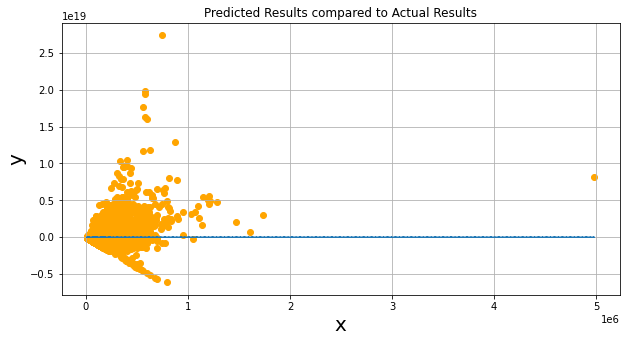

In [85]:
#Plot Findings
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
plt.show()

In [86]:
#Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()

In [87]:
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [88]:
y_hat = neigh.predict(x_test)
y_hat

array([ 29400., 110000., 224200., ...,  83200., 192600., 245800.])

In [89]:
np.array(y_test) #these are what actually happened for our x_test inputs.

array([ 29000, 110000, 225000, ...,  85000, 192000, 246000])

In [90]:
#Find MSE
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

3225660521.5386834


In [91]:
neigh.score(x_test, y_test)

0.8397754482266399

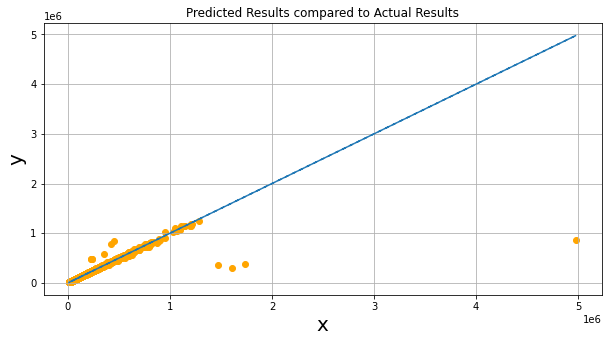

In [92]:
#Plot Findings
plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
plt.show()

In [105]:
#Decision Trees Regression
from sklearn import tree
from sklearn.model_selection import GridSearchCV
parameters = {'splitter':('best', 'random'), 'max_depth':[3, 5, 7]}
clf = tree.DecisionTreeRegressor()
grid = GridSearchCV(clf, parameters)
grid.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 7],
                         'splitter': ('best', 'random')})

In [114]:
grid.best_params_

{'max_depth': 7, 'splitter': 'best'}

In [115]:
clf_pred = grid.predict(x_test)

In [116]:
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [117]:
#Find MSE
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

6957999723.863035


In [118]:
clf.score(x_test, y_test)

0.8175819584564831

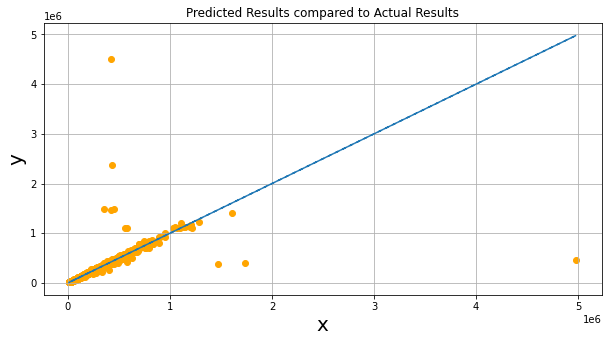

In [119]:
#Plot Findings
plt.figure(figsize=(10,5))
plt.plot(y_test, y_test, '--')
#plt.scatter(y_test,y_test, c='green')
plt.scatter(y_test, y_hat, c='orange')
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('Predicted Results compared to Actual Results')
plt.grid('on')
plt.show()